# San Francisco Restaurant Project

## Inspection Scores

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_score_data = pd.read_csv('Restaurant_Scores_-_LIVES_Standard.csv')

In [3]:
raw_score_data.head()

business_id                    business_name  business_address  \
0         1922                 All stars Donuts    901 Clement St   
1        67448              Soo Fong Restaurant  3801 03rd St 370   
2         1757  Dar Bar Pakistani/Indian Cusine      1412 Polk St   
3        93022           Wise Sons Delicatessen    537 Octavia St   
4         4864        DRAGON CITY BAKERY & CAFE   2367 MISSION St   

   business_city business_state business_postal_code  business_latitude  \
0  San Francisco             CA                94118          37.782694   
1  San Francisco             CA                94124          37.741829   
2  San Francisco             CA                94109          37.789784   
3  San Francisco             CA                94102                NaN   
4  San Francisco             CA                94110          37.759174   

   business_longitude         business_location  business_phone_number  \
0         -122.468969  (37.782694, -122.468969)                    NaN   
1         -122.388098  (37.741829, -122.388098)                    NaN   
2         -122.420455  (37.789784, -122.420455)                    NaN   
3                 NaN                       NaN                    NaN   
4         -122.419066  (37.759174, -122.419066)           1.415583e+10   

    inspection_id         inspection_date  inspection_score  \
0   1922_20160225  02/25/2016 12:00:00 AM              86.0   
1  67448_20180507  05/07/2018 12:00:00 AM              92.0   
2   1757_20170928  09/28/2017 12:00:00 AM              86.0   
3  93022_20180907  09/07/2018 12:00:00 AM              92.0   
4   4864_20161206  12/06/2016 12:00:00 AM              84.0   

         inspection_type           violation_id  \
0  Routine - Unscheduled   1922_20160225_103154   
1  Routine - Unscheduled  67448_20180507_103149   
2  Routine - Unscheduled   1757_20170928_103131   
3  Routine - Unscheduled  93022_20180907_103119   
4  Routine - Unscheduled   4864_20161206_103157   

                               violation_description  risk_category  
0       Unclean or degraded floors walls or ceilings       Low Risk  
1  Wiping cloths not clean or properly stored or ...       Low Risk  
2                   Moderate risk vermin infestation  Moderate Risk  
3  Inadequate and inaccessible handwashing facili...  Moderate Risk  
4  Food safety certificate or food handler card n...       Low Risk

## Data Cleaning

In [4]:
#replace 0 lat and long with np.nan
raw_score_data['business_latitude'] = raw_score_data['business_latitude'].replace(0, np.NaN)
raw_score_data['business_longitude'] = raw_score_data['business_longitude'].replace(0, np.NaN)

#drop NaN values in the colums we require 
clean_data = raw_score_data.dropna(axis=0, subset=['business_latitude', 'business_longitude', 'business_name', 'inspection_score'])
#drop unneccesary columns
clean_data = clean_data.drop(['inspection_id', 'violation_id', 'business_phone_number', 'inspection_type', 'business_location', 'violation_description'], axis = 1)
#convert inspection date to datetime object
clean_data['inspection_date'] = pd.to_datetime(clean_data['inspection_date'])
#sort the data by date and keep only the most recent inspection instance for each business
clean_data = clean_data.sort_values('inspection_date')
clean_data = clean_data.drop_duplicates('business_id', keep = 'last')
clean_data.head()

business_id                   business_name           business_address  \
27309         7119          LO-COST MEAT MARKET #2               2918 24th St   
8967         64319            Littlegreencyclo LLC  Off The Grid-Upper Haight   
26003         4372  CLUB PUERTORRIQUENO OF SF INC.           3249A MISSION St   
23218        67606                  Mayo & Mustard               75 Hawthorne   
40620         5291  EL TONAYENSE CATERING TRUCK #2               3101 19th St   

       business_city business_state business_postal_code  business_latitude  \
27309  San Francisco             CA                94110          37.752768   
8967   San Francisco             CA                  NaN          37.777122   
26003  San Francisco             CA                94110          37.744901   
23218  San Francisco             CA                94105          37.785144   
40620  San Francisco             CA                94110          37.760583   

       business_longitude inspection_date  inspection_score risk_category  
27309         -122.410472      2016-02-17              77.0      Low Risk  
8967          -122.419639      2016-02-19             100.0           NaN  
26003         -122.420273      2016-02-26             100.0           NaN  
23218         -122.398383      2016-02-26              96.0      Low Risk  
40620         -122.413239      2016-02-29              90.0      Low Risk

In [5]:
dropwords = ['mollie stone', 'chevron', 'shell' 'marriott', 'hilton', 'school', 'hotel', "church","cathedral","convention center", "mosque",
            "islamic","synagogue","jewish","museum","academy","temple","safeway","target","whole foods","gas","trader joe's",
            "market", "pharmacy", "cvs", "drug","hotel","marriot","westin","ritz", "steamer", "montessori ", "children", "AMC", "costco", "7-eleven"]

In [6]:
for word in dropwords: 
    droplist = list(clean_data[clean_data['business_name'].str.contains(word, case=False)].index)
    for i in droplist:
        clean_data = clean_data.drop(i)

In [7]:
clean_data.head()

business_id                   business_name           business_address  \
8967         64319            Littlegreencyclo LLC  Off The Grid-Upper Haight   
26003         4372  CLUB PUERTORRIQUENO OF SF INC.           3249A MISSION St   
23218        67606                  Mayo & Mustard               75 Hawthorne   
40620         5291  EL TONAYENSE CATERING TRUCK #2               3101 19th St   
5485         35503    Left Coast Catering and Cafe               2152 03rd St   

       business_city business_state business_postal_code  business_latitude  \
8967   San Francisco             CA                  NaN          37.777122   
26003  San Francisco             CA                94110          37.744901   
23218  San Francisco             CA                94105          37.785144   
40620  San Francisco             CA                94110          37.760583   
5485   San Francisco             CA                94107          37.762368   

       business_longitude inspection_date  inspection_score risk_category  
8967          -122.419639      2016-02-19             100.0           NaN  
26003         -122.420273      2016-02-26             100.0           NaN  
23218         -122.398383      2016-02-26              96.0      Low Risk  
40620         -122.413239      2016-02-29              90.0      Low Risk  
5485          -122.388877      2016-03-11              98.0      Low Risk

## Initial Exploratory Data Analysis

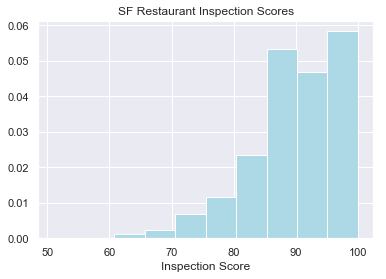

In [8]:
sns.set()
plt.hist(clean_data['inspection_score'], density=True, color ='lightblue' )
plt.title('SF Restaurant Inspection Scores')
plt.xlabel('Inspection Score')
plt.show()

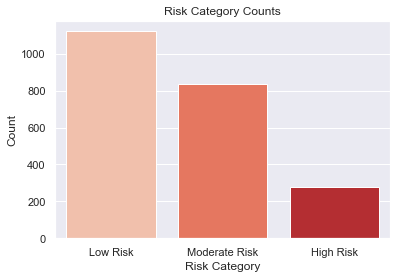

In [9]:
sns.countplot(clean_data['risk_category'], palette="Reds")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.title("Risk Category Counts")
plt.show()

In [10]:
import json
with open('keys.json') as file:
    keys = json.load(file)
GOOGLE_KEY = keys.get('google')
YELP_KEY = keys.get('yelp')

In [11]:
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap
from bokeh.transform import linear_cmap
from bokeh.palettes import Reds, Blues, Greens

In [12]:
low_scores = clean_data.loc[clean_data['inspection_score'] < 86]
mid_scores = clean_data.loc[(clean_data['inspection_score'] >= 86) & (clean_data['inspection_score'] <=92)]
high_scores = clean_data.loc[clean_data['inspection_score'] > 92]

In [13]:
output_notebook()
map_options = GMapOptions(lat=37.7749, lng=-122.4194, map_type="roadmap", zoom=11)

p = gmap(GOOGLE_KEY, map_options, title="San Francisco Restaurant Health Inspection Scores")

low_mapper = linear_cmap(field_name = 'inspection_score', palette=Reds[5], low = 50, high = 86)
mid_mapper = linear_cmap(field_name = 'inspection_score', palette=Blues[4], low = 92, high = 86)
high_mapper = linear_cmap(field_name = 'inspection_score', palette=Greens[4], low = 100, high = 92)


low = ColumnDataSource(low_scores)
mid = ColumnDataSource(mid_scores)
high = ColumnDataSource(high_scores)

p.circle(x='business_longitude', y='business_latitude', size=3, color=low_mapper, 
         fill_alpha=0.7, source=low, legend = "Low Scores")
p.circle(x='business_longitude', y='business_latitude', size=3, color=mid_mapper, 
         fill_alpha=0.7, source=mid, legend = "Mid Scores")
p.circle(x='business_longitude', y='business_latitude', size=3, color=high_mapper, 
         fill_alpha=0.7, source=high, legend = "High Scores")

p.legend.location = "top_left"
p.legend.click_policy="hide"
show(p)

Loading BokehJS ...

## Yelp Data Retrieval 

In [14]:
import requests #for querying the yelp api
import json

In [15]:
def data_collector(dataframe, index, api_key):
    """Collects Data For a Griven Restaurant From Yelp"""
    #takes data frame and index as input. Outputs Dictionary with yelp information
    #will return 0 if failure
    #json and requests are neccessary

    #datafame col names must be in original formating
    #extract search information form data frame
    name = raw_score_data.iloc[index]['business_name']
    address = raw_score_data.iloc[index]['business_address']
    lat = raw_score_data.iloc[index]['business_latitude']
    long = raw_score_data.iloc[index]['business_longitude']


    url_match = "https://api.yelp.com/v3/businesses/matches"
    url_business = "https://api.yelp.com/v3/businesses/"

    #parameters to send api are fed int the querystring
    querystring = {"name":name,"city":"San%20Francisco","state":"CA","country":"US","address1":address,"latitude": lat,"longitude":long}
    payload = ""

    #API authorization is sent through the header
    headers = {
    'Authorization': "Bearer " + api_key,
    'cache-control': "no-cache",
    }

    #query yelp API using requests
    match_response = requests.request("GET", url_match, data=payload, headers=headers, params=querystring)
    match_dict = match_response.json()
    if match_response.status_code == 429:
        return 429
    if match_response.status_code != 200:
        return 0
    if len(match_dict['businesses']) == 0:
        return 0

    business_id = match_dict['businesses'][0]['id']

    business_response = requests.request("GET", url_business + business_id, data=payload, headers=headers)

    if business_response.status_code != 200:
        return 0

    info = business_response.json()

    #return business information from yelp
    return info

In [17]:
working_clean = pd.read_csv('clean_data_initial.csv')
working_yelp = working_clean

In [18]:
with open('apipull') as file:
    api_data = json.load(file)

### Extracting what we need from the api pull

In [21]:
working_yelp['api_data'] = api_data
working_yelp['api_data'] = working_yelp['api_data'].replace(0, np.NaN)
working_yelp = working_yelp.dropna(subset=['api_data'])

In [23]:
working_yelp['price'] = working_yelp['api_data'].apply(lambda x: x.get('price'))
working_yelp['rating'] = working_yelp['api_data'].apply(lambda x: x.get('rating'))
working_yelp['review_count'] = working_yelp['api_data'].apply(lambda x: x.get('review_count'))
working_yelp['hours']= working_yelp['api_data'].apply(lambda x: x.get('hours'))
working_yelp['yelp_id']= working_yelp['api_data'].apply(lambda x: x.get('id'))

/Users/samsheridan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/samsheridan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/samsheridan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [24]:
def get_cats(x):
    categories = []
    try:
        for value in x.get('categories')[0].values():
            categories.append(value)
        c = ", ".join(str(x) for x in categories)
    except:
        c = np.NaN
    return c

In [25]:
def get_trans(x):
    trans=[] 
    try:
        for val in x.get('transactions'):
            trans.append(val)   
        t = ", ".join(str(x) for x in trans)
    except: 
        t = np.NaN
    return t

In [26]:
working_yelp['categories'] = working_yelp['api_data'].apply(get_cats)
working_yelp['transactions'] = working_yelp['api_data'].apply(get_trans)

/Users/samsheridan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/samsheridan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
pricemap = {'$':"One", '$$':"Two", '$$$':"Three", "$$$$":"Four"}
p_dtype = pd.api.types.CategoricalDtype(categories=["One", "Two", "Three", "Four"], ordered=True)
working_yelp.replace(pricemap, inplace=True)
working_yelp['price'] = working_yelp['price'].astype(p_dtype)

/Users/samsheridan/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/samsheridan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Inspecting The Yelp Data

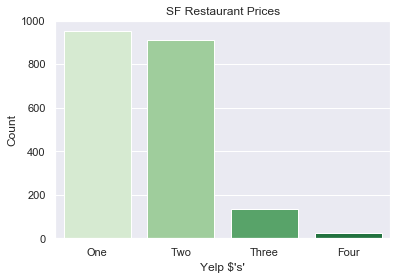

In [31]:
sns.countplot(working_yelp['price'], palette="Greens")
plt.xlabel("Yelp $'s'")
plt.ylabel("Count")
plt.title("SF Restaurant Prices")
plt.show()

In [32]:
one_dollar = working_yelp.loc[working_yelp['price'] == 'One']
two_dollar = working_yelp.loc[working_yelp['price'] == 'Two']
three_dollar = working_yelp.loc[working_yelp['price'] == 'Three']
four_dollar = working_yelp.loc[working_yelp['price'] == 'Four']

In [33]:
output_notebook()
map_options = GMapOptions(lat=37.7749, lng=-122.4194, map_type="roadmap", zoom=11)

r = gmap(GOOGLE_KEY, map_options, title="San Francisco Restaurants by Price Level")


one = ColumnDataSource(one_dollar)
two = ColumnDataSource(two_dollar)
three = ColumnDataSource(three_dollar)
four = ColumnDataSource(four_dollar)

r.circle(x='business_longitude', y='business_latitude', size=3, color="Green", 
         fill_alpha=0.7, source=one, legend = "$")
r.circle(x='business_longitude', y='business_latitude', size=3, color="Blue", 
         fill_alpha=0.7, source=two, legend = "$$")
r.circle(x='business_longitude', y='business_latitude', size=3, color="Orange", 
         fill_alpha=0.7, source=three, legend = "$$$")
r.circle(x='business_longitude', y='business_latitude', size=3, color="Red", 
         fill_alpha=0.7, source=four, legend = "$$$$")

r.legend.location = "top_left"
r.legend.click_policy="hide"
show(r)

Loading BokehJS ...